In [80]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [81]:
wine = pd.read_csv('winequalityN.csv')
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Давайте проанализируем данные, дадим определение переменных, выявим наличие пропусков в столбцах.

##### Описание переменных

###### Категориальная переменная: 

__type__ - тип вина (белое или красное)

###### Количественные переменные: 

1. __fixed acidity__ - фиксированная кислотность; данный тип кислот участвует в сбалансированности вкуса вина, привносит свежесть вкусу; с точки зрения процентного содержания кислоты, вино будет иметь кислотность от 0,6 до 0,7%. В данном датасете единица измерения г/дм3.

2. __volatile acidity__ - летучая кислотность; является мерой газообразных кислот вина; количество летучих кислот в вине часто считается показателем порчи. В среднем белых вин 1,2 г/л и 1,75 г/л для красных. В данном датасете единица измерения г/дм3.

3. __citric acid__	- лимонная кислота; является продуктом брожения виноградного сусла или мезги; до 2 г/дм3

4. __residual sugar__ - остаточный сахар; характеристика, показывающая количество сахара, который не был превращен в спирт в процессе ферментации вина; до 40 г/дм3.

5. __chlorides__ - хлориды; характеризует бактериостатические и бактерицидные свойства вина. В данном датасете единица измерения г/дм3.

6. __free sulfur dioxide_	- свободный диоксид серы (диоксид серы, готовый вступить в реакцию, то есть стабилизировать вино); пищевая добавка, выполняющая функции консерванта

7. __total sulfur dioxide__ -  суммарный диоксид серы

8. __density__	- плотность; определяется в первую очередь концентрацией спирта и сахара. Белые, розовые и красные вина, как правило, легче воды — их плотность при температуре 20°С ниже 998,3 кг/м 3

9. __pH__ - кислотность; отвечает за способность напитка долго храниться и за его сочетаемость с различными блюдами; обычно колеблется в пределах 2,8-3,5

10. __sulphates__ - сульфаты; сульфаты меди и железа применяются виноградарями на стадии выращивания винограда для обработки лозы от болезней. Эти химические элементы в напитке предназначены для сохранения в продукте вкуса, цвета и запаха.

11. __alcohol__	- спирт; содержание в вине варьируется в пределах 4,5%-15%, а в крепленых — до 20%. 

###### Целевая переменная:

__quality__ - оценка качества от 0 до 10

Посмотрим на распределение целевой переменной.

<AxesSubplot:xlabel='quality', ylabel='Count'>

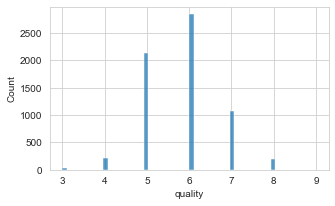

In [82]:
plt.figure(figsize=(5,3))
sns.histplot(wine.quality)

Диапазон значений находится между 3 и 9 и особых выбросов не наблюдается.

In [83]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [84]:
wine.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

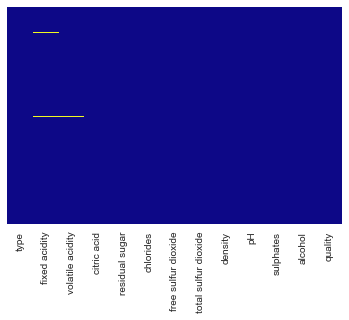

In [85]:
sns_heatmap = sns.heatmap(wine.sample(5000).isnull(), 
                          yticklabels=False, 
                          cbar=False, 
                          cmap='plasma')

Заметим, что количество строк, имеющих какие-либо пропуски, достаточно мало по сравнению с общим количеством наблюдений всего датасета и практически не видны на карте, поэтому выкинем строки без ущерба для данных.

In [86]:
wine = wine.dropna()
wine.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [87]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Можно заметить, что некоторые скачки значений по столбцам. Например, остаточный сахар в среднем достигает значений около 5 г/дм3 при стандартном отклонении в 4,7 г/дм3 и квантиле 75% всего лишь 8 г/дм3 , однако максимальное значение зафиксировано на уровне 65,8 г/дм3. Медиана остаточного сахара находится в районе 3 г/дм3, в то время как среднее значительно больше. Вероятно, такое смещение происходит из-за выбросов. Такие же закономерности можно заметить в столбцах свободного и общего диоксидов серы, причем так как свободный диоксид серы влияет на показатели общего, можно предположить, что, обработов пропуски в столбце свободного диоксида серы, параллельно улучшится качество столбца с информацией о общем диоксиде серы. Аналогично, в столбце хлоридов максимальное значение в 12 раз превышает среднее при стандартном отклонении всего в 0,03 г/дм3, что свидетельствует о наличии выбросов. Построим гистограммы, чтобы посмотреть визуально на распредления данных переменных.

Text(0.5, 1.0, 'Распределение остаточного сахара')

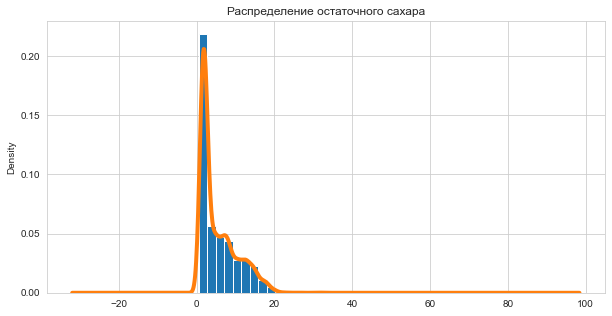

In [88]:
plt.figure(figsize = (10,5))

wine['residual sugar'].hist(bins=30, density=True);
wine['residual sugar'].plot(kind='kde', linewidth=4)
plt.title("Распределение остаточного сахара")

Text(0.5, 1.0, 'Распределение остаточного сахара')

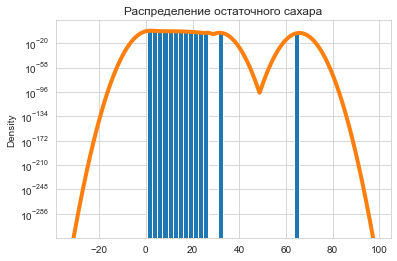

In [89]:
wine['residual sugar'].hist(bins=30, density=True, log=True);
wine['residual sugar'].plot(kind='kde', linewidth=4)
plt.title("Распределение остаточного сахара")

Гистограмма также указала на наличие выброса. Удалим данные строки, так как большое количество наблюдений позволяет нам это сделать без ущерба информативности.

In [90]:
wine = wine.drop(wine[wine['residual sugar'] >= 30].index)

Аналогично посмотрим на распределения хлоридов и диоксидов серы.

Text(0.5, 1.0, 'Распределение хлоридов')

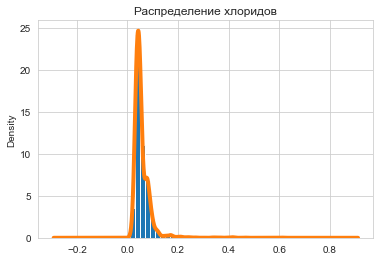

In [91]:
wine['chlorides'].hist(bins=30, density=True);
wine['chlorides'].plot(kind='kde', linewidth=4)
plt.title("Распределение хлоридов")

Text(0.5, 1.0, 'Распределение хлоридов')

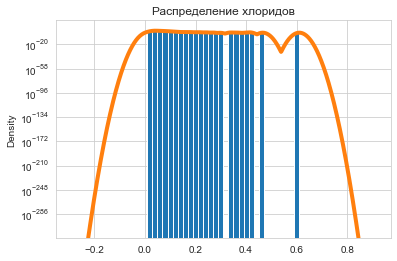

In [92]:
wine['chlorides'].hist(bins=30, density=True, log=True);
wine['chlorides'].plot(kind='kde', linewidth=4)
plt.title("Распределение хлоридов")

In [93]:
wine = wine.drop(wine[wine['chlorides'] >= 0.4].index)

Text(0.5, 1.0, 'Распределение свободного диоксида серы')

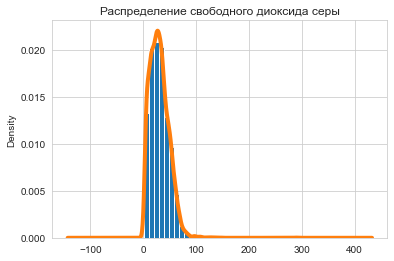

In [94]:
wine['free sulfur dioxide'].hist(bins=30, density=True);
wine['free sulfur dioxide'].plot(kind='kde', linewidth=4)
plt.title("Распределение свободного диоксида серы")

Text(0.5, 1.0, 'Распределение свободного диоксида серы')

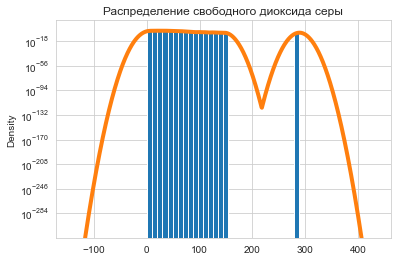

In [95]:
wine['free sulfur dioxide'].hist(bins=30, density=True, log=True);
wine['free sulfur dioxide'].plot(kind='kde', linewidth=4)
plt.title("Распределение свободного диоксида серы")

In [96]:
wine = wine.drop(wine[wine['free sulfur dioxide'] >= 140].index)

In [97]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000
mean,7.215415,0.339053,0.318140,5.434600,0.055260,30.489527,115.710784,0.994682,3.218683,0.529701,10.495614,5.820636
std,1.298377,0.164260,0.144569,4.678052,0.030136,17.413694,56.329131,0.002939,0.160526,0.145002,1.192962,0.872244
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994880,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,26.050000,0.387000,138.500000,366.500000,1.003690,4.010000,1.980000,14.900000,9.000000


In [98]:
wine.describe(include='object')

,type
count,6445
unique,2
top,white
freq,4865


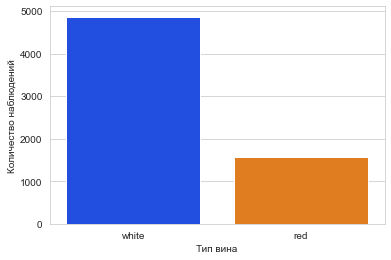

In [99]:
sns.set_style('whitegrid')
sns.countplot(x='type',data=wine,palette='bright')
plt.xlabel("Тип вина")
plt.ylabel("Количество наблюдений")
plt.show() 

Очевидно, в выборке преобладают наблюдения относительно белого вина. В дальнейшем заменим обозначения белого и красного вина на кодировку 0 и 1 в силу бинарности признака и для удобства анализа. 

Построим корреляционную матрицу по методу Пирсона, чтобы отследить взаимосвязь признаков, особенно влияние количественных признаков на показатели целевой переменной.

In [100]:
matrix_corr = wine.corr(method='pearson')
matrix_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219257,0.321919,-0.116253,0.326325,-0.286384,-0.330152,0.467100,-0.249176,0.300983,-0.094422,-0.075588
volatile acidity,0.219257,1.000000,-0.387178,-0.206456,0.408955,-0.359163,-0.416177,0.268632,0.264607,0.219378,-0.037630,-0.266235
citric acid,0.321919,-0.387178,1.000000,0.145345,-0.013622,0.141125,0.201619,0.091772,-0.324714,0.036509,-0.006117,0.088716
residual sugar,-0.116253,-0.206456,0.145345,1.000000,-0.134153,0.422391,0.502991,0.535958,-0.274983,-0.187328,-0.367387,-0.037891
chlorides,0.326325,0.408955,-0.013622,-0.134153,1.000000,-0.210481,-0.298906,0.408680,0.085673,0.335517,-0.273337,-0.212866
free sulfur dioxide,-0.286384,-0.359163,0.141125,0.422391,-0.210481,1.000000,0.721851,0.032076,-0.153389,-0.191293,-0.185464,0.066035
total sulfur dioxide,-0.330152,-0.416177,0.201619,0.502991,-0.298906,0.721851,1.000000,0.031349,-0.242694,-0.274389,-0.268266,-0.038880
density,0.467100,0.268632,0.091772,0.535958,0.408680,0.032076,0.031349,1.000000,0.013403,0.263322,-0.702266,-0.312162
pH,-0.249176,0.264607,-0.324714,-0.274983,0.085673,-0.153389,-0.242694,0.013403,1.000000,0.210330,0.117964,0.017076
sulphates,0.300983,0.219378,0.036509,-0.187328,0.335517,-0.191293,-0.274389,0.263322,0.210330,1.000000,0.005802,0.049243


Text(0.5, 1.0, 'Визуализация матрицы корреляций')

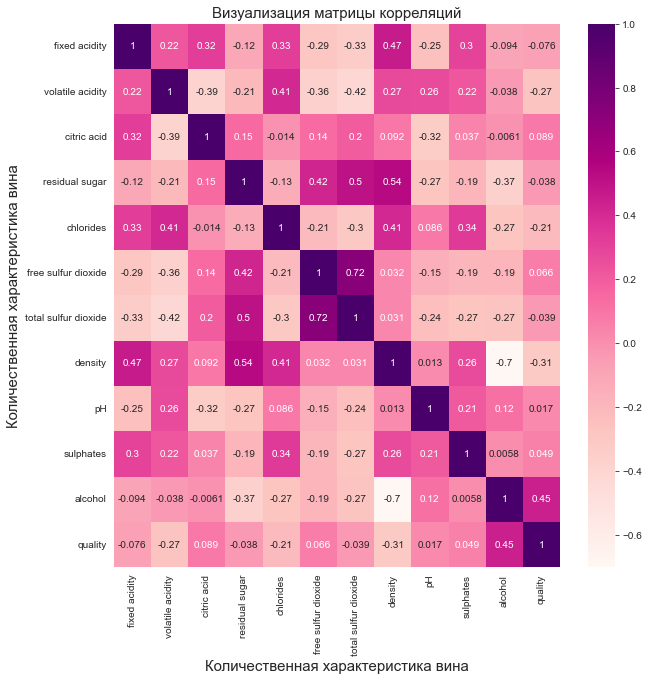

In [101]:
plt.figure(figsize = (10,10))

sns.heatmap(matrix_corr, cmap="RdPu", annot=True)

plt.xlabel('Количественная характеристика вина', fontsize=15)
plt.ylabel('Количественная характеристика вина', fontsize=15)
plt.title('Визуализация матрицы корреляций', fontsize=15)

1. Наиболее сильная положительная корреляция у фиксированной кислотности возникает с плотьностью вина, в то время как на количество спирта в вине и его качество эта переменная практически не влияет. Можно заметить, что фиксированная кислотность имеет примерно одинковоую корреляцию с содержанием лимонной кислоты, хлоридов и сульфатов.
2. Летутчая кислотность  довольно сильно отрицательно коррелирует с количеством лимонной кислоты и количеством диоксида серы (как свободного, так и суммарного). Примерно на одном уровне положительная корреляция летучей кислотности с фиксированной кислотностью, плотностью, кислотностью и сульфатами. Почти отсутсвует связь летучей кислотности и содержания спирта. А вот качество вина отрицательно зависит от летучей кислотности.
3. Ниболее значительная положительная корреляция у лимонной кислоты с фиксированной кислотностью, содержанием диоксида серы и остаточного сахара. Довольно сильная отрицательная корреляция прослеживается с летучей кислотностью. С остальными показателями корреляция составляет чуть больше нуля. На качество вина данный признак не влияет.
4. Сильную зависимость можно заметить между значением остаточного сахара с плотностью, а также к содержанием диоксида серы. Отрицательную корреляцию можно наблюдать между соедрданием остаточного сахара в вине и летучастями, хлоридами, кислотностью и сульфатами. Довольно сильную отрицательную корреляцию мы видим с количеством спирта. На качество вина данная переменная почти не влияет.
5. Наиболее сильная положительная корреляция у хлоридов с летучастями, плотностью и сульфатами. Наиболее значительная отрицательная корреляция заметна с значениями дикосида серы, соедржанием спирта и качествомм вина.
6. Самая сильная корреляция (среды всех переменных) наблюдается между значениями свободного диоксида серы и суммарного диоксида серы. 
7. Самое сильное положительное влияние на качество вина оказывает содержание спирта в вине.

Построим диаграммы рассеивания качества вин и количественных переменных, имеющих наибольшую корреляцию по модулю (фиксированная кислотность, летучая кислотность, хлориды, плотность и содержание спирта), учитывая тип вина

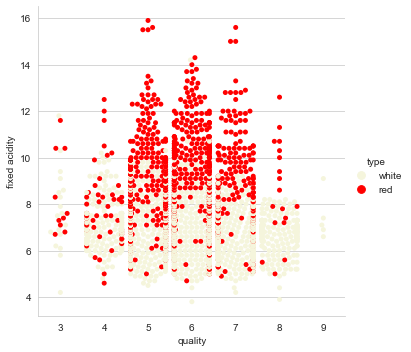

In [79]:
sns.catplot(data=wine, x='quality', y='fixed acidity', kind="swarm", hue='type', palette=sns.color_palette(['beige', 'red']))
plt.show()

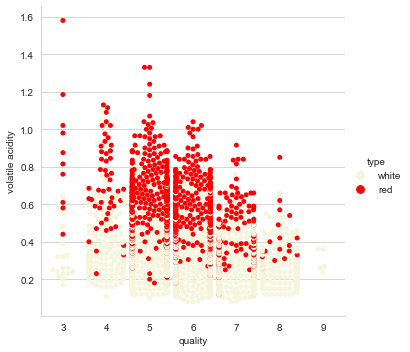

In [102]:
sns.catplot(data=wine, x='quality', y='volatile acidity', kind="swarm", hue='type', palette=sns.color_palette(['beige', 'red']))
plt.show()

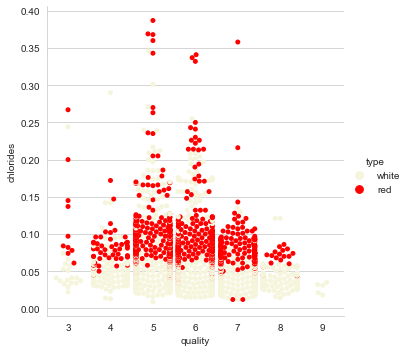

In [103]:
sns.catplot(data=wine, x='quality', y='chlorides', kind="swarm", hue='type', palette=sns.color_palette(['beige', 'red']))
plt.show()

На диаграмме зависимости качества вина от фиксированной кислотности можно наблюдать довольно большое количество выбросов, которые в дальнейшем будут учтены. Также стоит отметить, что тип вина влияет на содержание переменной(фиксированная кислотность у красного вина как правило выше), это связано с особенностями производства.

Похожую ситуацию с выбросами можно наблюдать также на диаграммах с летучей кислотностью и хлоридами.

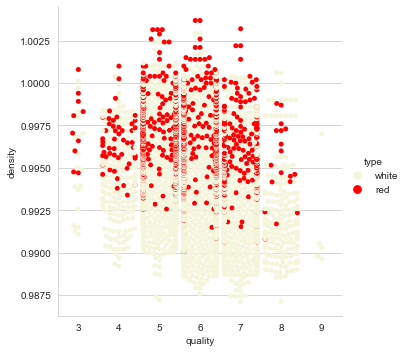

In [104]:
sns.catplot(data=wine, x='quality', y='density', kind="swarm", hue='type', palette=sns.color_palette(['beige', 'red']))
plt.show()

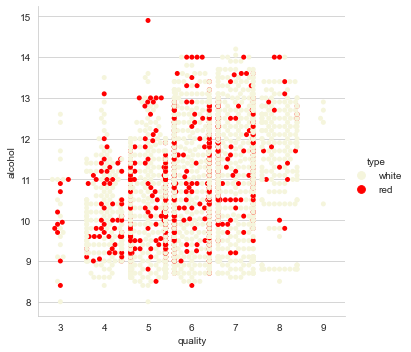

In [105]:
sns.catplot(data=wine, x='quality', y='alcohol', kind="swarm", hue='type', palette=sns.color_palette(['beige', 'red']))
plt.show()

Из диаграммы плотности можно понять, что белое вино зачастую обладает меньшей плотностью. Однако есть сорта белых вин имеющих плотность красных. Значения переменной разбросаны в хаотичном порядке, вследствие чего можно сделать вывод о том, что на рассматриваемый признак влияет не сорт винограда, а процедура изготовления. То же самое можно сказать и о содержании спирта в напитке.

Благодаря диаграммам рассеивания, стало понятно, что в зависимости от типа вина, можно наблюдать различия в значениях показателей. Попробуем проанализировать показатели вин, группируя их по цвету

In [ ]:
wine_pivot = wine.pivot_table(
    index='type', columns='fixed acidity', 
    values=wine.describe(), aggfunc='median'
)

wine_pivot

## Гипотезы

Несколько гипотез, которые можно протестировать для оценки качества вина на основе его химических характеристик:

1. Гипотеза о влиянии содержания алкоголя на оценку качества вина:  

Н0:  Вино с более высоким содержанием алкоголя будет иметь более высокую оценку качества. 

Н1: Более высокое содержание алкоголя не влияет на оценку качества

2. Гипотеза о влиянии уровня кислотности на оценку качества вина: 

Н0: Вино с более низким или умеренным уровнем кислотности будет иметь более высокую оценку качества. 

Н1:Уровень кислотности не влияет на оценку качества 

3. Гипотеза о влиянии содержания сахара на оценку качества вина: 

Н0: Вино с более высоким содержанием остаточного сахара будет иметь более высокую оценку качества, особенно для красного вина. 

Н1: Содержание остаточного сахара не влияет на оценку качества вина

4. Гипотеза о влиянии уровня pH на оценку качества вина: 

Н0: Вино с оптимальным уровнем pH (не слишком кислотным и не слишком щелочным) будет иметь более высокую оценку качества. 

Н1: Уровень pH не влияет на оценку качества

5. Гипотеза о влиянии содержания оксида серы на оценку качества вина: 

Н0: Вино с более низким содержанием диоксида серы будет иметь более высокую оценку качества, так как слишком высокое содержание может оказывать негативное влияние на вкус и аромат. 

Н1: Содержание диоксидов серы не влияет на оценку качества 

6. Гипотеза о различном влиянии химических характеристик в зависимости от типа вина: 

Н0: Чем выше показатели кислотности, хлоридов, плотности у красных вин и чем меньше у белых, тем выше оценка качества. 

Н1: Оценка качества вина не зависит от химических различий вин в соответствии с их типом